In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Define the model
model = Sequential()

# Add CNN layers
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3), kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

# Add Dense layers
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))  
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='softmax'))  # Assuming 10 classes

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary() 

c:\Users\Leister\anaconda3\envs\prediction_model\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,764,296 (10.54 MB)

 Trainable params: 2,764,296 (10.54 MB)

 Non-trainable params: 0 (0.00 B)

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,Callback
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
import numpy as np 


train_dir = r'C:\Users\Leister\Desktop\School\Thesis\Split_Data(60)\train'
valid_dir = r'C:\Users\Leister\Desktop\School\Thesis\Split_Data(60)\valid'
test_dir = r'C:\Users\Leister\Desktop\School\Thesis\Split_Data(60)\test'

In [10]:
# Create ImageDataGenerator instances for training, validation, and test sets
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0

)

# Keep validation and test data with just rescaling
valid_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 480 images belonging to 8 classes.
Found 160 images belonging to 8 classes.
Found 160 images belonging to 8 classes.


In [12]:
# Define the model
model = Sequential()

# Add CNN layers
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3), kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

# Add Dense layers
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))  
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='softmax'))  # Assuming 8 classes

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Custom Callback to Save Model Only When Accuracy & Val Accuracy >= 89%
class CustomCheckpoint(Callback):
    def __init__(self, model_path):
        super(CustomCheckpoint, self).__init__()
        self.model_path = model_path
        self.best_acc = 0  # Store the best training accuracy
        self.best_val_acc = 0  # Store the best validation accuracy

    def on_epoch_end(self, epoch, logs=None):
        acc = logs.get('accuracy', 0)
        val_acc = logs.get('val_accuracy', 0)

        # Save model only if both accuracy and validation accuracy are the best seen so far
        if acc >= 0.80 and val_acc >= 0.80:
            if val_acc > self.best_val_acc or (val_acc == self.best_val_acc and acc > self.best_acc):
                self.best_acc = acc  # Update best training accuracy
                self.best_val_acc = val_acc  # Update best validation accuracy
                print(f"\n✅ Saving best model at epoch {epoch + 1} - Accuracy: {acc:.4f}, Val Accuracy: {val_acc:.4f}")
                self.model.save(self.model_path)

# Initialize the custom checkpoint
custom_checkpoint = CustomCheckpoint('cnnnewtest128_60e.h5')

history = model.fit(
    train_generator,
    epochs=60,
    validation_data=valid_generator,
    callbacks=[custom_checkpoint]
)

Epoch 1/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 975ms/step - accuracy: 0.2857 - loss: 2.6939 - val_accuracy: 0.6500 - val_loss: 1.5791
Epoch 2/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 939ms/step - accuracy: 0.6268 - loss: 1.6676 - val_accuracy: 0.7000 - val_loss: 1.2535
Epoch 3/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 866ms/step - accuracy: 0.7134 - loss: 1.3288 - val_accuracy: 0.7563 - val_loss: 1.1263
Epoch 4/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 843ms/step - accuracy: 0.7531 - loss: 1.1193 - val_accuracy: 0.7750 - val_loss: 0.9973
Epoch 5/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 861ms/step - accuracy: 0.8136 - loss: 0.9780 - val_accuracy: 0.8000 - val_loss: 0.9577
Epoch 6/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 660ms/step - accuracy: 0.8002 - loss: 0.9873


✅ Saving best model at epoch 6 - Accuracy: 0.8104, Val Accuracy: 0.8125
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 854ms/step - accuracy: 0.8009 - loss: 0.9843 - val_accuracy: 0.8125 - val_loss: 0.8928
Epoch 7/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 687ms/step - accuracy: 0.8645 - loss: 0.8174


✅ Saving best model at epoch 7 - Accuracy: 0.8646, Val Accuracy: 0.8750
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 906ms/step - accuracy: 0.8645 - loss: 0.8182 - val_accuracy: 0.8750 - val_loss: 0.8023
Epoch 8/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 833ms/step - accuracy: 0.8664 - loss: 0.8058 - val_accuracy: 0.8375 - val_loss: 0.8910
Epoch 9/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 753ms/step - accuracy: 0.8686 - loss: 0.7856 - val_accuracy: 0.8438 - val_loss: 0.8403
Epoch 10/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 840ms/step - accuracy: 0.8877 - loss: 0.7345 - val_accuracy: 0.7937 - val_loss: 0.9837
Epoch 11/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 821ms/step - accuracy: 0.8543 - loss: 0.7683 - val_accuracy: 0.8375 - val_loss: 0.8058
Epoch 12/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 838ms/step - accuracy: 0.9260 - loss: 0.6684 - val_accuracy: 0.7937 - val_loss: 0.9568
Epoch 13/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 775ms/step - accuracy: 0.8961 - loss: 0.6962 - val_accuracy: 0.8000 - val_loss: 0.9883
Epoch 14/60
15/15 ━━━━━━━━━━━━━


✅ Saving best model at epoch 32 - Accuracy: 0.9646, Val Accuracy: 0.8813
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 770ms/step - accuracy: 0.9773 - loss: 0.4282 - val_accuracy: 0.8813 - val_loss: 0.8114
Epoch 33/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 812ms/step - accuracy: 0.9677 - loss: 0.4510 - val_accuracy: 0.8250 - val_loss: 1.0316
Epoch 34/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 786ms/step - accuracy: 0.9651 - loss: 0.5030 - val_accuracy: 0.8625 - val_loss: 0.8467
Epoch 35/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 772ms/step - accuracy: 0.9633 - loss: 0.4665 - val_accuracy: 0.8188 - val_loss: 0.9905
Epoch 36/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 741ms/step - accuracy: 0.9770 - loss: 0.4559 - val_accuracy: 0.8438 - val_loss: 1.0350
Epoch 37/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 753ms/step - accuracy: 0.9355 - loss: 0.5058 - val_accuracy: 0.8125 - val_loss: 1.0085
Epoch 38/60
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 758ms/step - accuracy: 0.9692 - loss: 0.4722 - val_accuracy: 0.8562 - val_loss: 0.9258
Epoch 39/60
15/15 ━━━━━━━━━━

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 436ms/step - accuracy: 0.8326 - loss: 1.0096
Test accuracy: 80.62499761581421
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 429ms/step


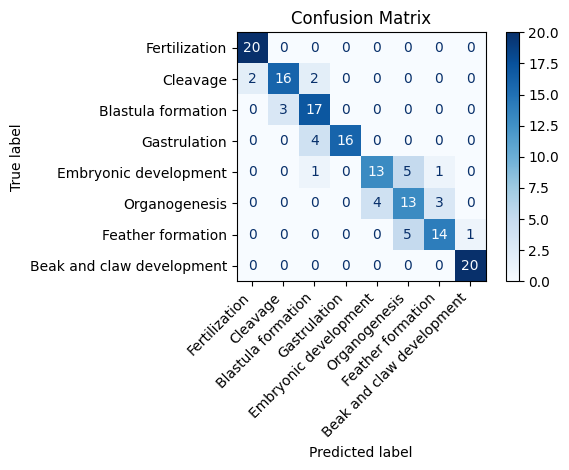

Classification Report:
                           precision    recall  f1-score   support

            Fertilization       0.91      1.00      0.95        20
                 Cleavage       0.84      0.80      0.82        20
       Blastula formation       0.71      0.85      0.77        20
             Gastrulation       1.00      0.80      0.89        20
    Embryonic development       0.76      0.65      0.70        20
            Organogenesis       0.57      0.65      0.60        20
        Feather formation       0.78      0.70      0.74        20
Beak and claw development       0.95      1.00      0.98        20

                 accuracy                           0.81       160
                macro avg       0.81      0.81      0.81       160
             weighted avg       0.81      0.81      0.81       160



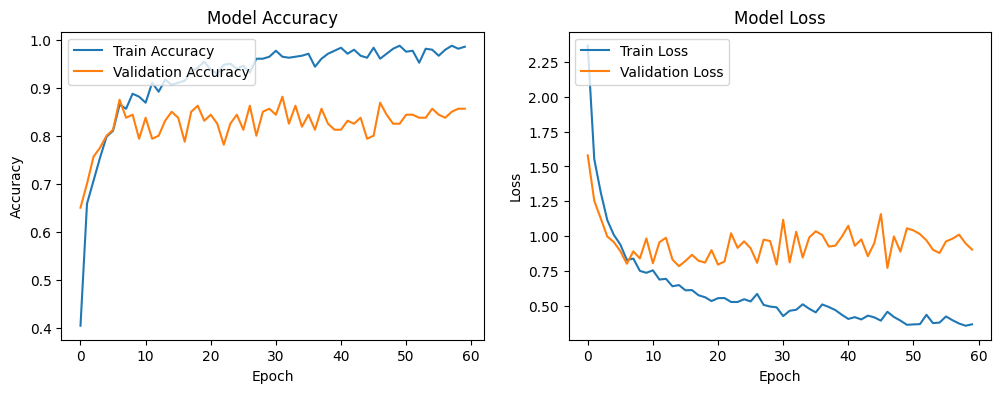

In [14]:
# Evaluate the model
from tensorflow.keras.models import load_model

#best_model = load_model('cnnnew64_60e.h5')
test_loss, test_acc = model.evaluate(test_generator)
acc = test_acc * 100

print(f'Test accuracy: {acc}')


y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred_classes)

# Define the developmental stage labels
developmental_stages = [
    "Fertilization", 
    "Cleavage", 
    "Blastula formation", 
    "Gastrulation", 
    "Embryonic development", 
    "Organogenesis", 
    "Feather formation", 
    "Beak and claw development"
]

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=developmental_stages)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()


# Generate classification report
class_labels = list(test_generator.class_indices.keys())
report = classification_report(test_generator.classes, y_pred_classes, target_names=developmental_stages)
print(f'Classification Report:\n{report}')

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

model.save('cnn60e_128xnew.h5')

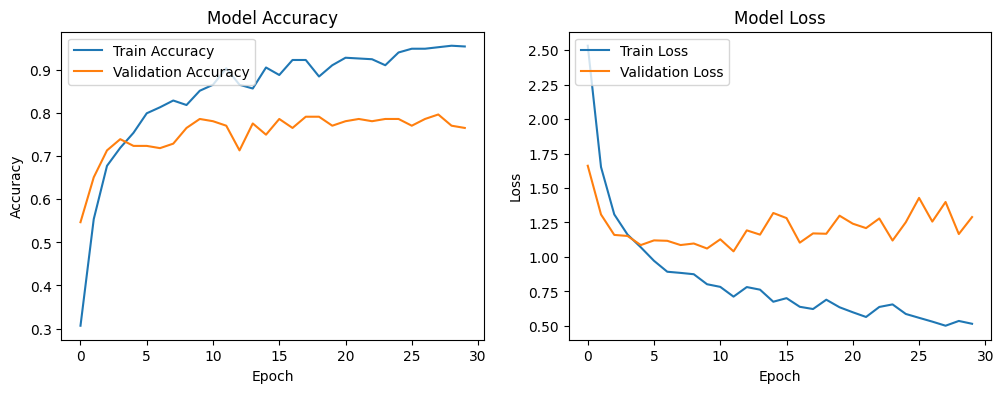

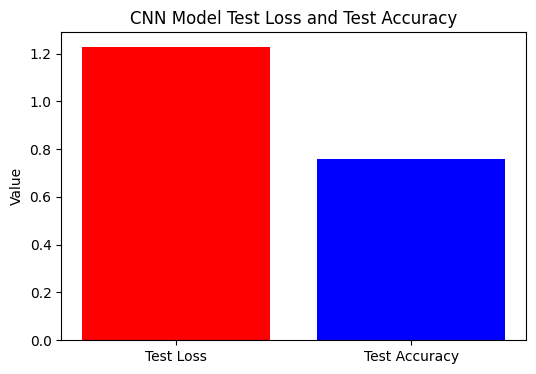

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


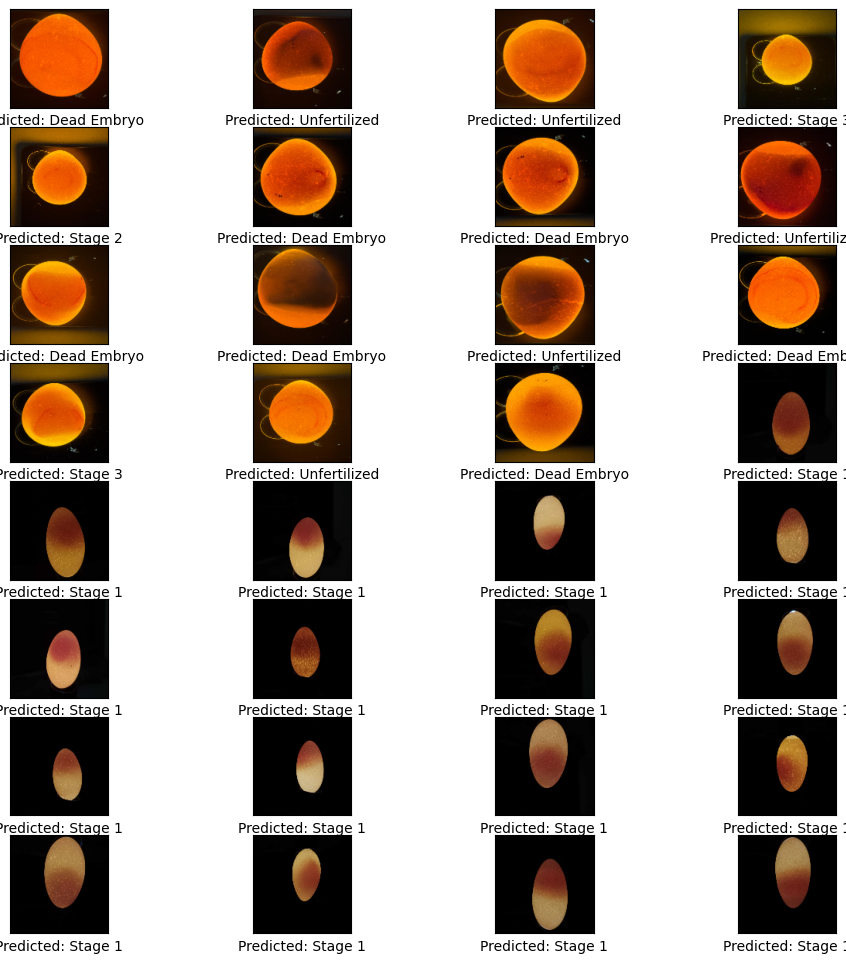

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


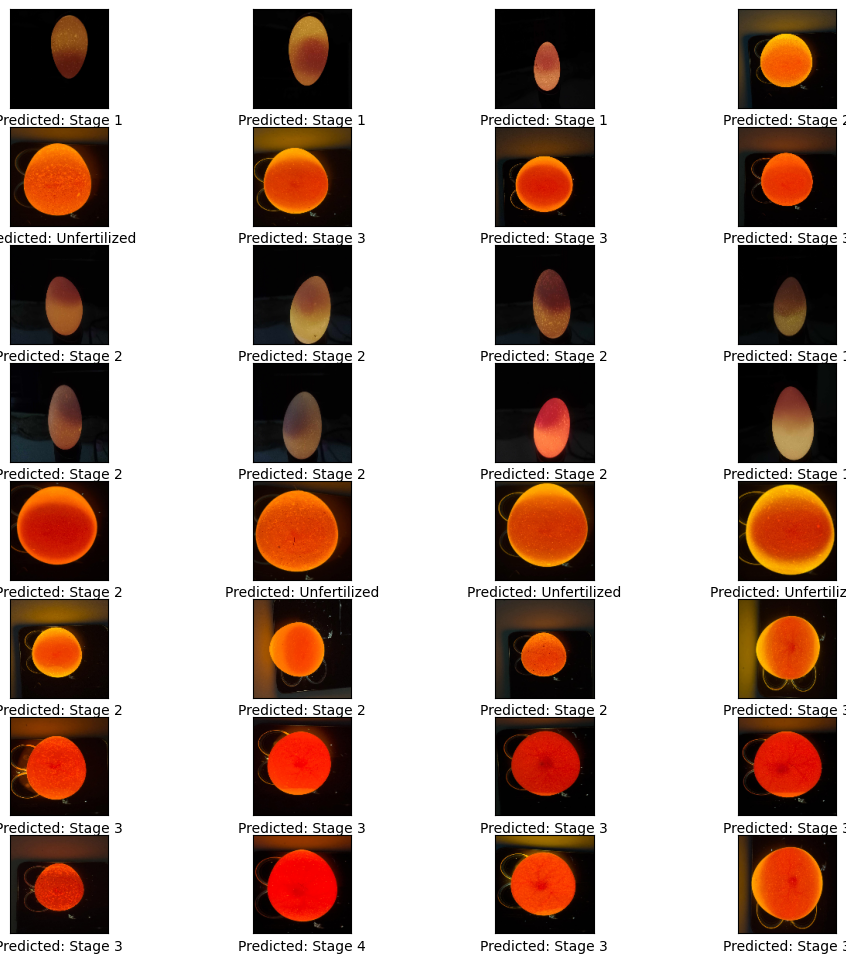

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


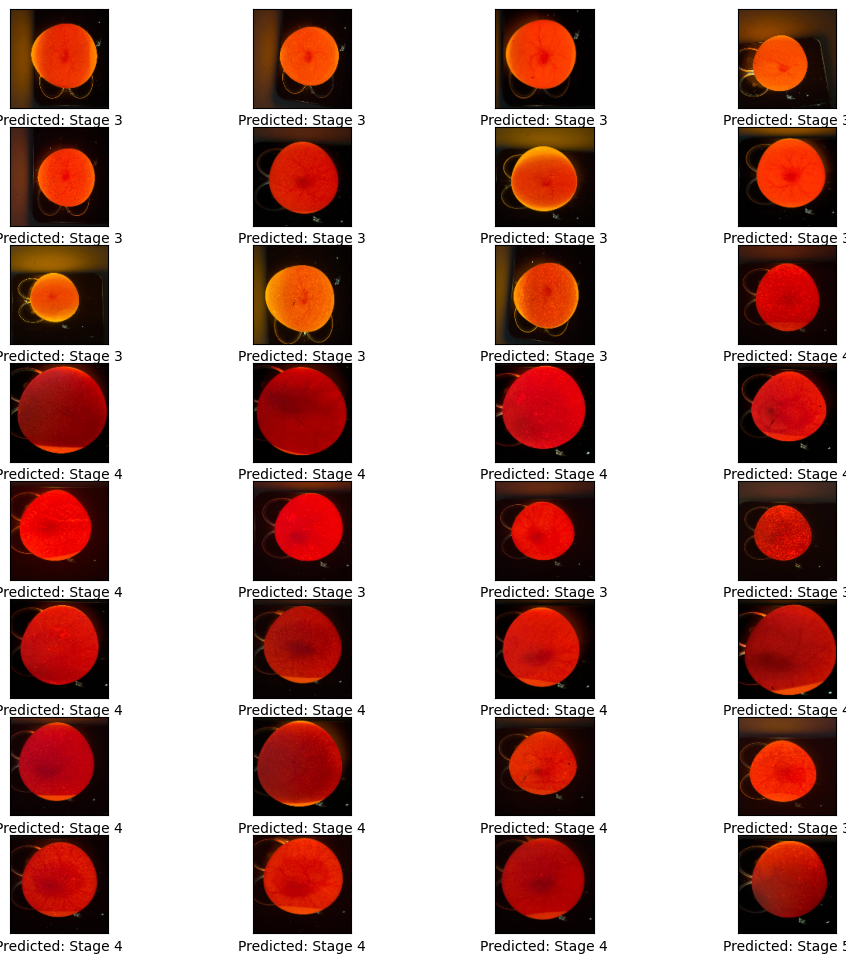

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


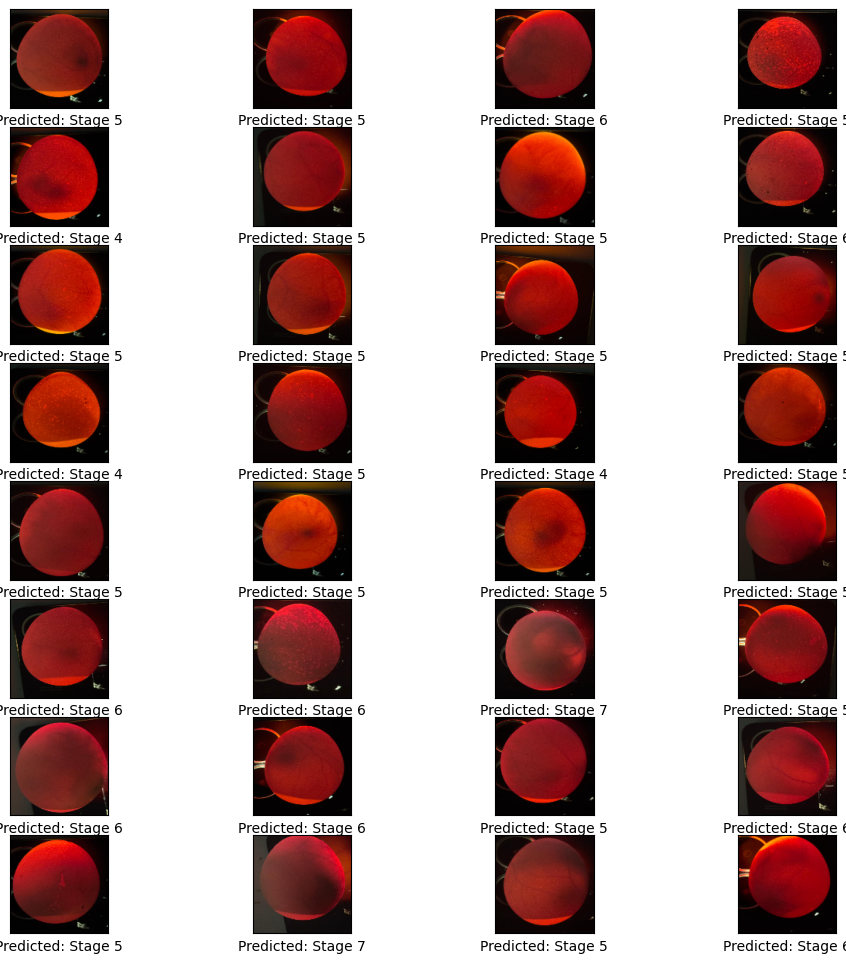

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


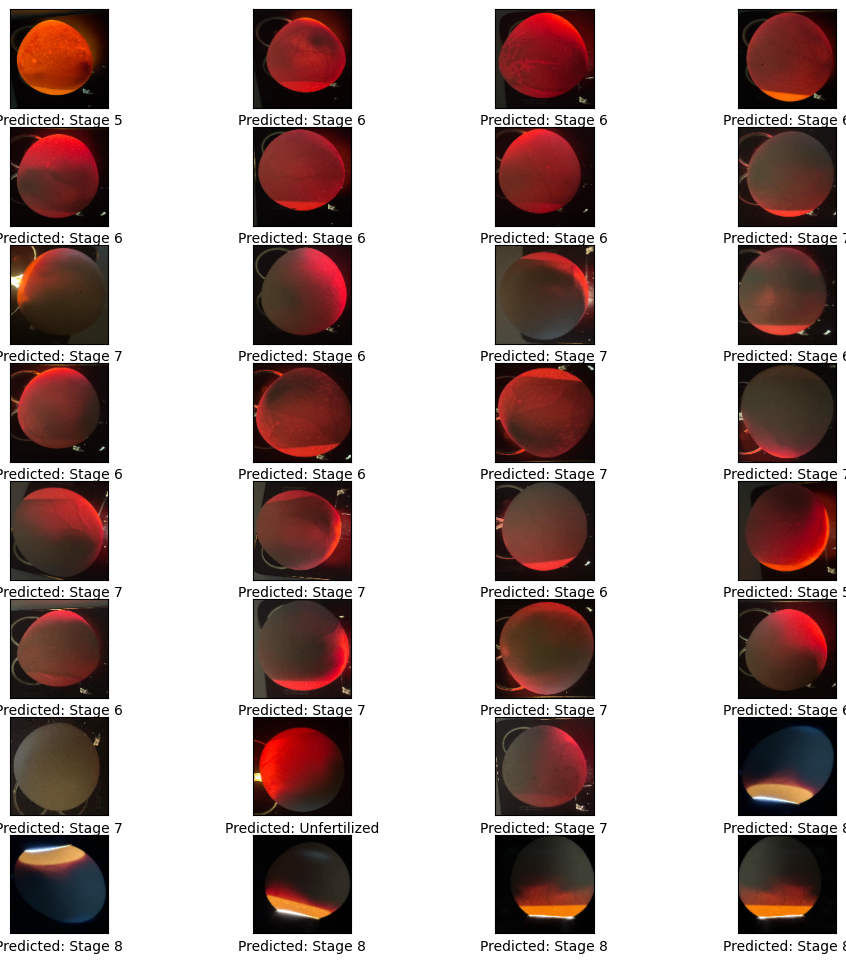

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


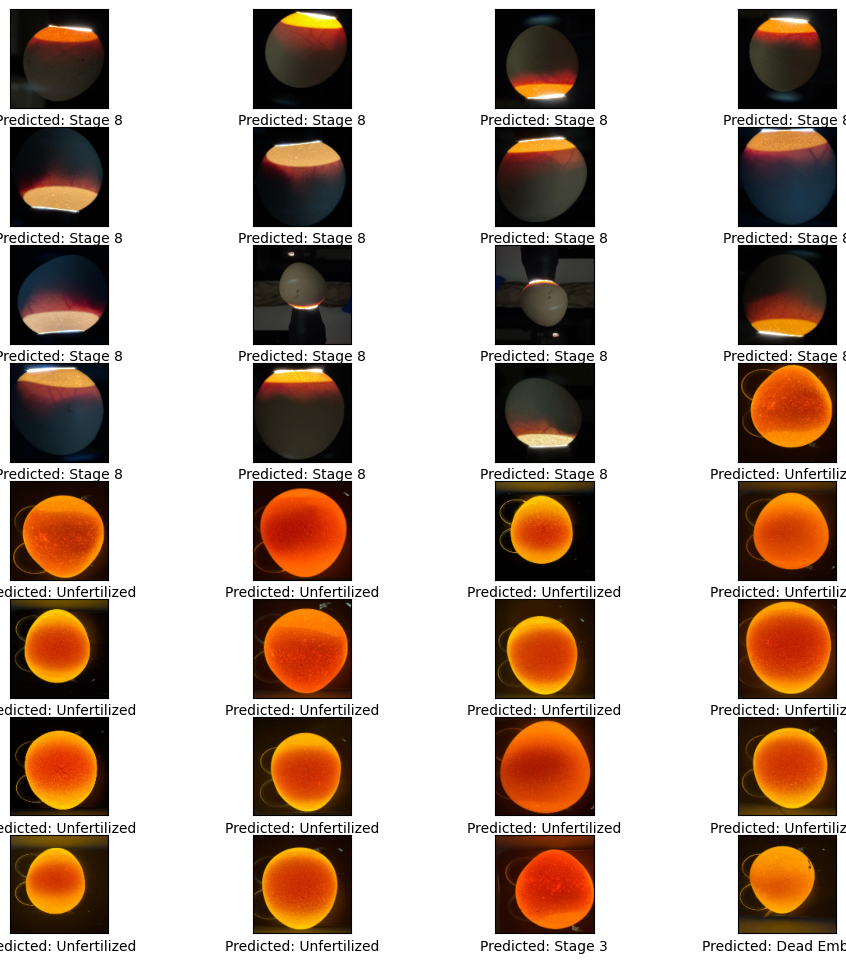

In [24]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

# Plot test loss and test accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Test Loss', 'Test Accuracy'], [test_loss, test_acc], color=['red', 'blue'])
plt.title('CNN Model Test Loss and Test Accuracy')
plt.ylabel('Value')
plt.show()

# Display images with their predicted labels
for i in range(len(test_generator)):
    images, labels = test_generator[i]
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    
    num_images = len(images)
    num_cols = 4
    num_rows = (num_images // num_cols) + (num_images % num_cols > 0)
    
    plt.figure(figsize=(12, 12))
    for j in range(num_images):
        plt.subplot(num_rows, num_cols, j + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[j])
        plt.xlabel(f'Predicted: {class_labels[predicted_classes[j]]}')
    plt.show()

In [25]:
# Define the model
model = Sequential()

# Add CNN layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

# Add Dense layers
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))  
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(10, activation='softmax'))  # Assuming 10 classes

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\Leister\anaconda3\envs\prediction_model\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,550,218 (24.99 MB)

 Trainable params: 6,550,218 (24.99 MB)

 Non-trainable params: 0 (0.00 B)

DATA AUGMENTATION


In [3]:
import os
from PIL import Image

# Define paths to the data directories
input_dir = r'C:\Users\Leister\Desktop\School\Thesis\Stages'
output_dir = r'C:\Users\Leister\Desktop\School\Thesis\Stages\Stage_flipped'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Loop through each class folder in the input directory
for class_folder in os.listdir(input_dir):
    class_path = os.path.join(input_dir, class_folder)
    if os.path.isdir(class_path):
        # Create the corresponding class folder in the output directory
        output_class_path = os.path.join(output_dir, class_folder)
        if not os.path.exists(output_class_path):
            os.makedirs(output_class_path)
        
        # Loop through each image in the class folder
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            if os.path.isfile(image_path):
                # Open the image
                image = Image.open(image_path)
                
                # Flip the image horizontally
                flipped_image = image.transpose(Image.FLIP_TOP_BOTTOM)
                
                # Generate the new image name
                name, ext = os.path.splitext(image_name)
                new_image_name = f"{name}_flipped{ext}"
                
                # Save the flipped image to the output directory
                output_image_path = os.path.join(output_class_path, new_image_name)
                flipped_image.save(output_image_path)

print("Images have been flipped and saved successfully.")

Images have been flipped and saved successfully.


In [5]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths to the data directories
input_dir = r'C:\Users\Leister\Desktop\School\Thesis\Stages'
output_dir = r'C:\Users\Leister\Desktop\School\Thesis\Split_Data(70)'

# Define the split ratios
train_ratio = 0.7
valid_ratio = 0.15
test_ratio = 0.15

# Create the output directories if they don't exist
train_dir = os.path.join(output_dir, 'train')
valid_dir = os.path.join(output_dir, 'valid')
test_dir = os.path.join(output_dir, 'test')

for dir_path in [train_dir, valid_dir, test_dir]:
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)

# Loop through each class folder in the input directory
for class_folder in os.listdir(input_dir):
    class_path = os.path.join(input_dir, class_folder)
    if os.path.isdir(class_path):
        # Get all image file names in the class folder
        image_names = os.listdir(class_path)
        
        # Split the data into train, valid, and test sets
        train_names, temp_names = train_test_split(image_names, train_size=train_ratio, random_state=42)
        valid_names, test_names = train_test_split(temp_names, test_size=test_ratio/(test_ratio + valid_ratio), random_state=42)
        
        # Create class folders in the output directories
        for dir_path in [train_dir, valid_dir, test_dir]:
            class_output_path = os.path.join(dir_path, class_folder)
            if not os.path.exists(class_output_path):
                os.makedirs(class_output_path)
        
        # Copy the images to the respective directories
        for image_name in train_names:
            shutil.copy(os.path.join(class_path, image_name), os.path.join(train_dir, class_folder, image_name))
        
        for image_name in valid_names:
            shutil.copy(os.path.join(class_path, image_name), os.path.join(valid_dir, class_folder, image_name))
        
        for image_name in test_names:
            shutil.copy(os.path.join(class_path, image_name), os.path.join(test_dir, class_folder, image_name))

print("Data has been split into train, valid, and test sets and saved successfully.")

Data has been split into train, valid, and test sets and saved successfully.


In [11]:
import os
from PIL import Image

# Define paths to the data directories
input_dir = r'C:\Users\Leister\Desktop\School\Thesis\Augmented\Stage_flippedSsS'
output_dir = r'C:\Users\Leister\Desktop\School\Thesis\Augmented\Stage_flippedx'

# Specify the folder to be flipped
selected_folder = 'Stage 8'  # Change this to the name of the folder you want to flip

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Loop through each class folder in the input directory
for class_folder in os.listdir(input_dir):
    if class_folder == selected_folder:
        class_path = os.path.join(input_dir, class_folder)
        if os.path.isdir(class_path):
            # Create the corresponding class folder in the output directory
            output_class_path = os.path.join(output_dir, class_folder)
            if not os.path.exists(output_class_path):
                os.makedirs(output_class_path)
            
            # Loop through each image in the class folder
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                if os.path.isfile(image_path):
                    # Open the image
                    image = Image.open(image_path)
                    
                    # Flip the image horizontally
                    flipped_image = image.transpose(Image.FLIP_LEFT_RIGHT)
                    
                    # Generate the new image name
                    name, ext = os.path.splitext(image_name)
                    new_image_name = f"{name}_flipped{ext}"
                    
                    # Save the flipped image to the output directory
                    output_image_path = os.path.join(output_class_path, new_image_name)
                    flipped_image.save(output_image_path)

print("Images have been flipped and saved successfully.")

Images have been flipped and saved successfully.
